In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt


In [3]:
#loading data
data = pd.read_csv("College_Data.csv")
#printing the 10 first rows
print(data.head(10))

                           Name Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   
7                Albion College     Yes  1899    1720     489         37   
8              Albright College     Yes  1038     839     227         30   
9     Alderson-Broaddus College     Yes   582     498     172         21   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1

In [4]:
#print A short description
print(data.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

In [5]:
# . Select Variables for Clustering
# Because K-Means requires numerical features:
# • Remove “Name” (string)
# • Convert Private to numeric (Yes=1, No=0)
# • Keep all other numeric columns
# • Store the final numerical dataframe as df_numeric

#1.drop The row of Univ Name
data = data.drop(["Name"] ,axis = 1)
print(data.head())




  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2    

In [ ]:
# Convert Private to numeric (Yes=1, No=0)
data["Private"] = data["Private"].replace(["Yes","No"],[1,0])
# print(data.to_string())
print(data.head(10))


In [24]:
# • Store the final numerical dataframe as df_numeric
df_numeric = data.copy()
print(df_numeric.head())
print(df_numeric.shape)

   Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  

In [23]:
#function to get how many centroids the user wants
def k_cluster():
    #in the origin how many rows
    while True:
     try: 
      k = int(input("Enter How many cluster to group"))
      if k >1:
       return k
      else:
        print("Please Enter A number > 1")
     except ValueError:
        print("Invalid Number, please Try again")


In [22]:

import random

def initialize_centroids(data, k):
    list1 = []
    r1 = random.sample(range(len(data)), k)  
    for i  in r1:
        list1.append(list(data.iloc[i]))  
    return list1



    




In [21]:

#it will raise en error after so we need to convert if to np array 


def compute_distance(point, centroids):
    distances = []
    for c in centroids:        
        diff = np.array(c) - np.array(point)  
        distance = np.sqrt(np.sum(diff**2))  
        distances.append(distance)           
    return distances


In [20]:
#function of Assign each data point to the nearest centroid
#Assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    labels = []  # this will store the cluster number for each row
    
    for i in range(len(data)):  
        point = list(data.iloc[i])  
        distances = compute_distance(point, centroids) 
        cluster = distances.index(min(distances)) 
        labels.append(cluster)  
    
    return labels

     

In [19]:
def update_centroids(data, labels, k):
    new_centroids = []  # to store updated centroids
    
    for i in range(k):  # for each cluster
        cluster_points = []  # to store points in this cluster
        
        # collect points belonging to this cluster
        for j in range(len(data)):
            if labels[j] == i:
                cluster_points.append(list(data.iloc[j]))
        
        # calculate mean for each column
        if cluster_points:  # make sure cluster is not empty
            mean_point = []
            for col in range(len(cluster_points[0])):  # for each column
                col_sum = 0
                for row in cluster_points:
                    col_sum += row[col]
                mean_point.append(col_sum / len(cluster_points))
            new_centroids.append(mean_point)
        else:
            # if cluster is empty, pick a random row as new centroid
            new_centroids.append(list(data.iloc[random.randint(0, len(data)-1)]))
    
    return new_centroids


In [34]:
def compute_inertia(data, labels, centroids):
    sse = 0
    
    for i in range(len(data)):
        point = list(data.iloc[i])
        cluster = labels[i]
        centroid = centroids[cluster]
        
        # compute distance squared
        diff = 0
        for j in range(len(point)):
            diff += (point[j] - centroid[j])**2
        
        sse += diff
    
    return sse


In [17]:
def kmeans(data, k, max_iter=100, patience=2):
    # 1. Initialize centroids randomly
    centroids = initialize_centroids(data, k)
    
    # 2. Initialize variables
    old_labels = None
    patience_counter = 0
    
    # 3. Repeat until max_iter or patience
    for iteration in range(max_iter):
        # Assign points to clusters
        labels = assign_clusters(data, centroids)
        
        # Check if labels did not change
        if labels == old_labels:
            patience_counter += 1
        else:
            patience_counter = 0
        
        # Stop if patience limit reached
        if patience_counter >= patience:
            print(f"Stopped early at iteration {iteration+1}")
            break
        
        # Update centroids based on current clusters
        centroids = update_centroids(data, labels, k)
        old_labels = labels.copy()
    
    # Return final labels and centroids
    return labels, centroids
    

In [31]:
#part C

# 1. Ask user for number of clusters
k = k_cluster()  # this will ask: "Enter How many cluster to group"

# 2. Run K-Means algorithm
labels, centroids = kmeans(df_numeric, k, max_iter=100, patience=2)

# 3. Print results
print("\nFinal Labels:", labels)         # cluster number for each row
print("\nFinal Centroids:\n", centroids) # values of the final centroids





Enter How many cluster to group 4


Stopped early at iteration 25

Final Labels: [1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 1, 3, 1, 2, 0, 3, 0, 3, 1, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 1, 3, 3, 0, 2, 2, 3, 3, 3, 3, 1, 3, 0, 0, 1, 1, 1, 3, 3, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 2, 3, 3, 3, 0, 1, 3, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 2, 1, 1, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 0, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 0, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 2, 1, 2, 0, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 0, 3, 1, 1, 1, 0, 1, 3, 0, 3, 0, 1, 1, 1, 3, 2, 1, 1, 3, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 

In [ ]:
# Working of Elbow Point
# The Elbow Method works in the following steps:

# 1. We begin by selecting a range of k values (for example, 1 to 10).

# 2. For each k, we run K-Means and calculate WCSS (Within-Cluster Sum of Squares), which shows how close the data points are to their cluster centroids:
"""
3. After computing WCSS for all k values, we plot k vs WCSS.

4. WCSS always decreases as k increases because more clusters reduce the internal spread.

5. However, after a certain point, the improvement becomes very small. This bend or “elbow” in the curve indicates the point where adding more clusters no longer gives meaningful improvement.
"""

In [27]:
wcss_list = []
def elbow_method(data, k_range):
    
    global wcss_list
    for k in k_range:
        labels, centroids = kmeans(data, k, max_iter=100, patience=2)
        wcss = compute_inertia(data, labels, centroids)
        wcss_list.append(wcss)
        print(f"k = {k}, WCSS = {wcss}")
    
    
    


In [33]:
#testing the elbow method 
k_range = list(range(2,11))
elbow_method(df_numeric,k_range)


Stopped early at iteration 15
k = 2, WCSS = 48356202397.322075
Stopped early at iteration 12
k = 3, WCSS = 32365874710.06133
Stopped early at iteration 32
k = 4, WCSS = 26478906294.429115
Stopped early at iteration 29
k = 5, WCSS = 20756223451.464966
Stopped early at iteration 24
k = 6, WCSS = 17782484783.64091
Stopped early at iteration 18
k = 7, WCSS = 15726484070.621971
Stopped early at iteration 38
k = 8, WCSS = 15112754864.619778
Stopped early at iteration 20
k = 9, WCSS = 14249609816.246819
Stopped early at iteration 49
k = 10, WCSS = 13255066886.388264


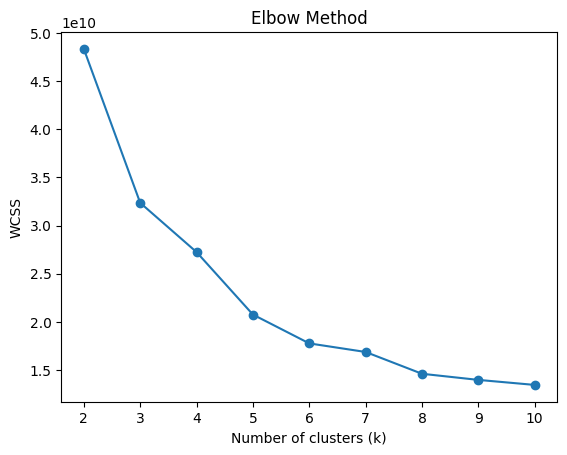

In [30]:

    plt.plot(k_range, wcss_list, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("WCSS")
    plt.title("Elbow Method")
    plt.show()